-> Heart Disease Prediction with Machine Learning
Predicting whether a patient has heart disease using KNN and Random Forest classifiers.
Dataset used : Cleveland Heart Disease Dataset | 303 patients | 14 features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../dataset/heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
print(df.info())
print("\n")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


              age         sex          cp    trestbps        chol         fbs   
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  \
mean    54.366337    0.683168    0.966997  131.623

-> Target Distribution
Checking if the dataset is balanced between disease (1) and no disease (0).

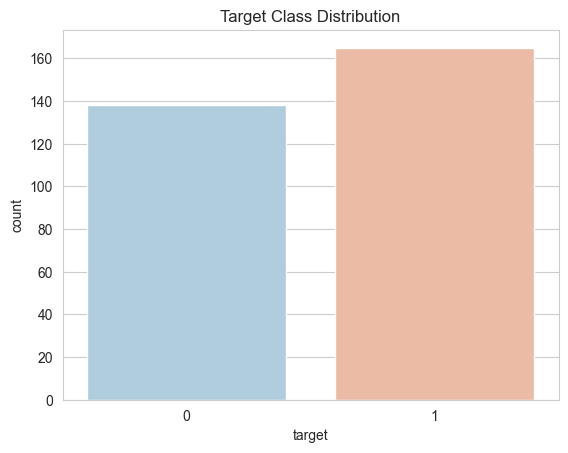

In [4]:
sns.set_style('whitegrid')
sns.countplot(x='target', data=df, palette='RdBu_r')
plt.title('Target Class Distribution')
plt.savefig('../images/target_distribution.png')
plt.show()

-> Feature Correlation Analysis
Identifying which features are most correlated with heart disease.

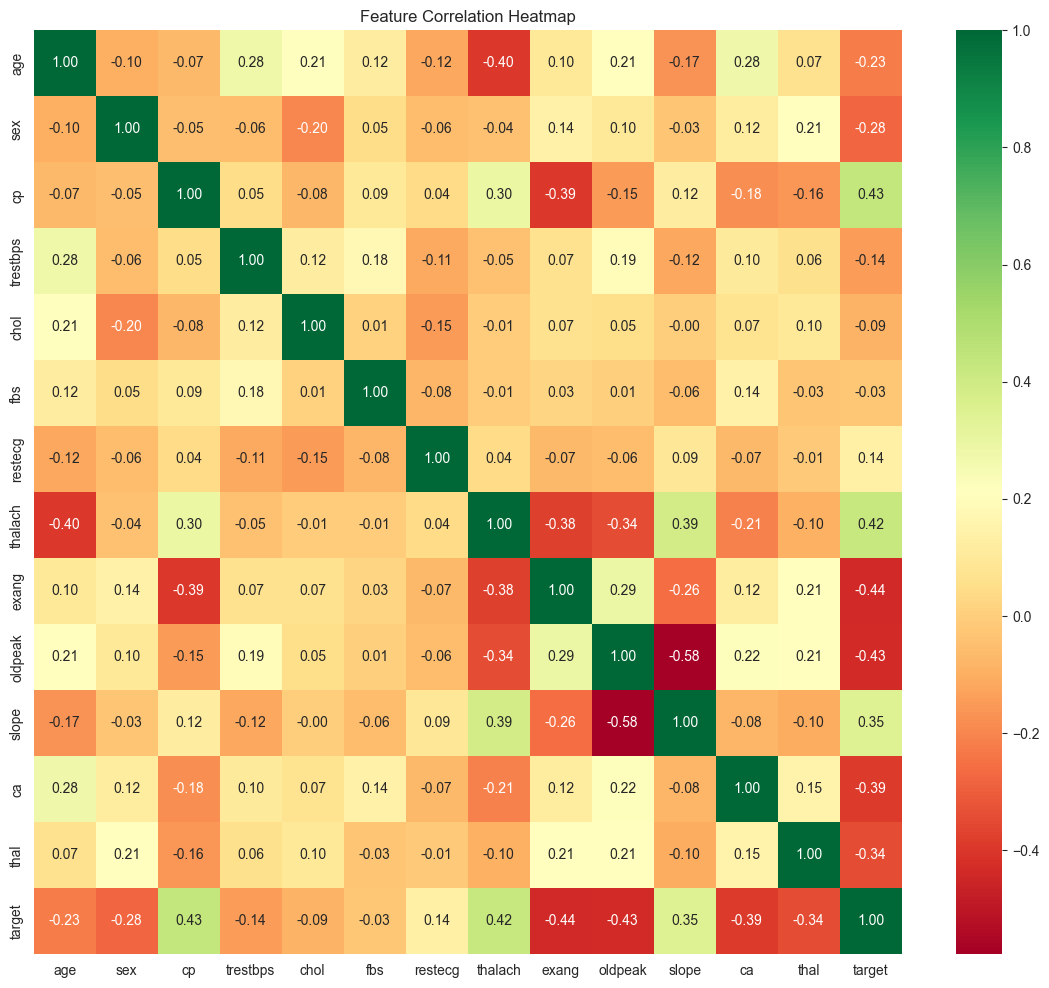

In [5]:
corrmat = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.savefig('../images/correlation_heatmap.png')
plt.show()

-> Data Preprocessing
One-hot encoding categorical variables + StandardScaler for continuous features.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

dataset = pd.get_dummies(df, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

scaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

X = dataset.drop(['target'], axis=1)
y = dataset['target']

print("Features shape:", X.shape)

Features shape: (303, 30)


-> Model 1: K-Nearest Neighbors
Testing K values from 1–20 using 10-fold cross-validation to find optimal K.

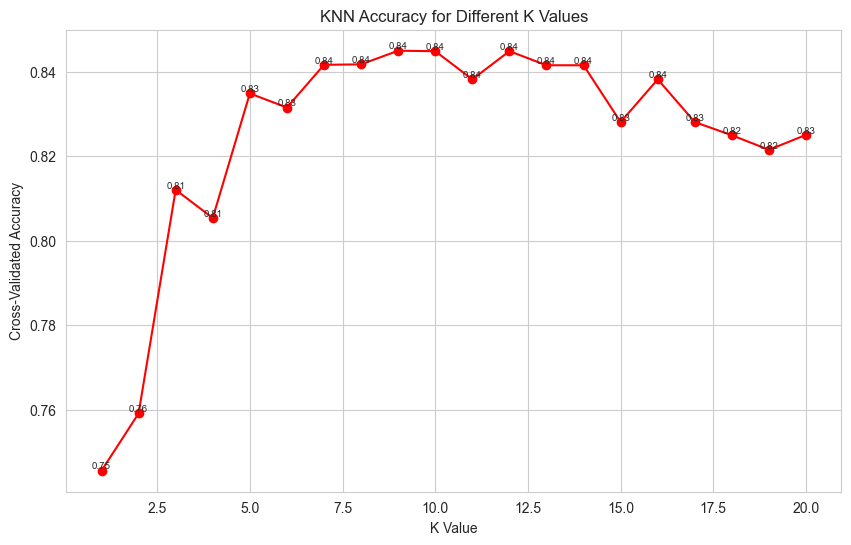

Best K: 9
Best Accuracy: 84.49%


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knn_scores = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=10)
    knn_scores.append(score.mean())

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), knn_scores, color='red', marker='o')
for i in range(20):
    plt.text(i+1, knn_scores[i], f'{knn_scores[i]:.2f}', fontsize=7, ha='center', va='bottom')
plt.xlabel('K Value')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.savefig('../images/knn_accuracy.png')
plt.show()

print(f"Best K: {knn_scores.index(max(knn_scores))+1}")
print(f"Best Accuracy: {max(knn_scores)*100:.2f}%")

-> Model 2: Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10, random_state=42)
rf_score = cross_val_score(rf, X, y, cv=10)
print(f"Random Forest Accuracy: {rf_score.mean()*100:.2f}%")

Random Forest Accuracy: 78.52%


Results Summary

| Model | Accuracy |
|-------|----------|
| KNN (k=12) | 84.48% |
| Random Forest | 81.14% |

-> KNN with k=12 performed best with 84.48% cross-validated accuracy.